Kernal SVM

Data Preprocessing stage:


Importing the libraries

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Importing the dataset

In [10]:
dataset = pd.read_csv('neo.csv')
X = dataset.iloc[:, 2:-1].values
y = dataset.iloc[:, -1].values

Encoding categorial data

encoding independent variable

In [11]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [4,5])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [12]:
print(X)

[[1.0 1.0 1.1982708007 ... 13569.2492241812 54839744.08284605 16.73]
 [1.0 1.0 0.2658 ... 73588.7266634981 61438126.52395093 20.0]
 [1.0 1.0 0.7220295577 ... 114258.6921290512 49798724.94045679 17.83]
 ...
 [1.0 1.0 0.0319561887 ... 7566.8077324922 28400768.1610167 24.6]
 [1.0 1.0 0.0073207399 ... 69199.1544835094 68692060.5345607 27.8]
 [1.0 1.0 0.0398616229 ... 27024.4555527296 59772130.59268528 24.12]]


Encoding dependent variable

In [13]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

Splitting the dataset into the Training set and Test set

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

Feature Scaling

In [15]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [16]:
print(X_train)

[[ 0.          0.         -0.41855692 ... -0.79657683  0.11822139
   2.92919472]
 [ 0.          0.         -0.32544362 ...  0.07190351 -0.85832669
   0.44176864]
 [ 0.          0.         -0.33394526 ... -0.80265634 -1.0587696
   0.51086381]
 ...
 [ 0.          0.         -0.34531592 ...  0.26409401  0.99492594
   0.61450656]
 [ 0.          0.         -0.15471923 ...  0.05908946  0.03852826
  -0.32173298]
 [ 0.          0.         -0.2201943  ... -0.40483996 -0.12460938
  -0.11099271]]


Training the Kernel SVM model on the Training set

1.Linear 

In [17]:
from sklearn.svm import SVC
lin_svm = SVC(kernel = 'linear', random_state = 0)
lin_svm.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

2.Gaussian(RBF)

In [18]:
rbf_svm = SVC(kernel = 'rbf', random_state = 0)
rbf_svm.fit(X_train, y_train)

SVC(random_state=0)

3.Polynomial

In [52]:
poly_svm = SVC(kernel = 'poly', random_state = 0)
poly_svm.fit(X_train, y_train)

SVC(kernel='poly', random_state=0)

4.Sigmoid

In [20]:
sig_svm = SVC(kernel = 'sigmoid', random_state = 0)
sig_svm.fit(X_train, y_train)

SVC(kernel='sigmoid', random_state=0)

Predicting the Test set results

1.Linear

In [21]:
y_pred_lin = lin_svm.predict(X_test)
print("Predicted results:",y_pred_lin)
print("Actual results:",y_test)

Predicted results: [0 0 0 ... 0 0 0]
Actual results: [0 1 0 ... 0 0 0]


2.rbf


In [22]:
y_pred_rbf = rbf_svm.predict(X_test)
print("Predicted results:",y_pred_rbf)
print("Actual results:",y_test)

Predicted results: [0 0 0 ... 0 0 0]
Actual results: [0 1 0 ... 0 0 0]


3.Polynomial

In [53]:
y_pred_poly = poly_svm.predict(X_test)
print("Predicted results:",y_pred_poly)
print("Actual results:",y_test)

Predicted results: [0 0 0 ... 0 0 0]
Actual results: [0 1 0 ... 0 0 0]


4.Sigmoid

In [23]:
y_pred_sig = sig_svm.predict(X_test)
print("Predicted results:",y_pred_sig)
print("Actual results:",y_test)

Predicted results: [0 0 0 ... 0 0 0]
Actual results: [0 1 0 ... 0 0 0]


precision and f1 scores

In [24]:
from sklearn.metrics import f1_score,precision_score

1.Linear

In [25]:

f=f1_score(y_test, y_pred_lin,average='weighted')
print('f1_score=',f)
precision=precision_score(y_test, y_pred_lin,average='micro')
print('precision=',precision)

f1_score= 0.8562468967606424
precision= 0.9024989908627207


2.rbf

In [26]:

f=f1_score(y_test, y_pred_rbf,average='weighted')
print('f1_score=',f)
precision=precision_score(y_test, y_pred_rbf,average='micro')
print('precision=',precision)

f1_score= 0.8801050867436843
precision= 0.9104986972955121


3.polynomial

In [54]:

f=f1_score(y_test, y_pred_poly,average='weighted')
print('f1_score=',f)
precision=precision_score(y_test, y_pred_lin,average='micro')
print('precision=',precision)

f1_score= 0.8562468967606424
precision= 0.9024989908627207


4.sigmoid

In [27]:

f=f1_score(y_test, y_pred_sig,average='weighted')
print('f1_score=',f)
precision=precision_score(y_test, y_pred_sig,average='micro')
print('precision=',precision)

f1_score= 0.8370860936049374
precision= 0.8387949066089317


Visualising the actual test set results

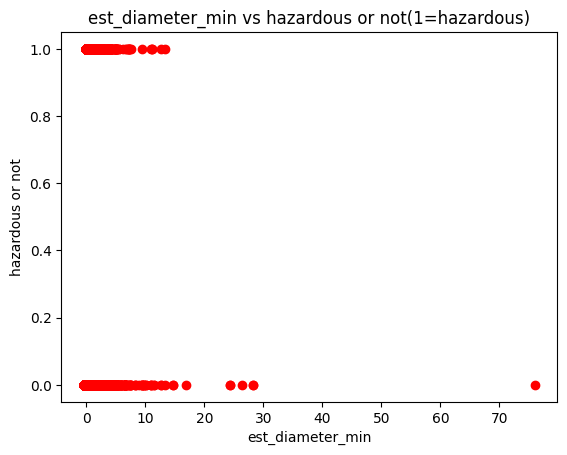

In [28]:
plt.scatter(X_test[:,2],y_test,color='red')
plt.title('est_diameter_min vs hazardous or not(1=hazardous)')
plt.xlabel('est_diameter_min')
plt.ylabel('hazardous or not')
plt.show()

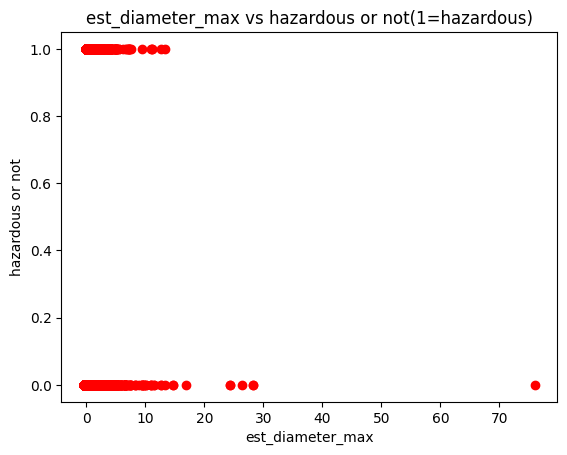

In [29]:
plt.scatter(X_test[:,3],y_test,color='red')
plt.title('est_diameter_max vs hazardous or not(1=hazardous)')
plt.xlabel('est_diameter_max')
plt.ylabel('hazardous or not')
plt.show()

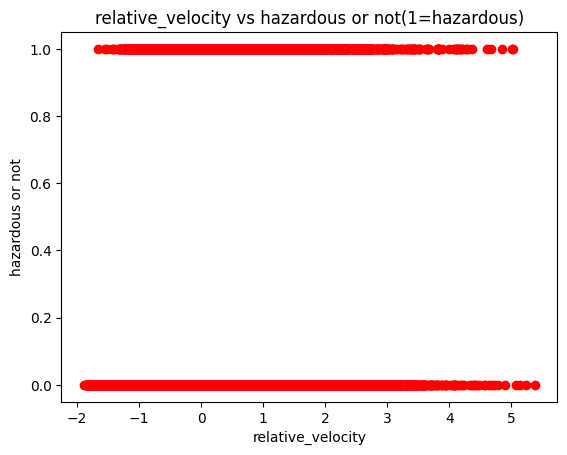

In [30]:
plt.scatter(X_test[:,4],y_test,color='red')
plt.title('relative_velocity vs hazardous or not(1=hazardous)')
plt.xlabel('relative_velocity')
plt.ylabel('hazardous or not')
plt.show()

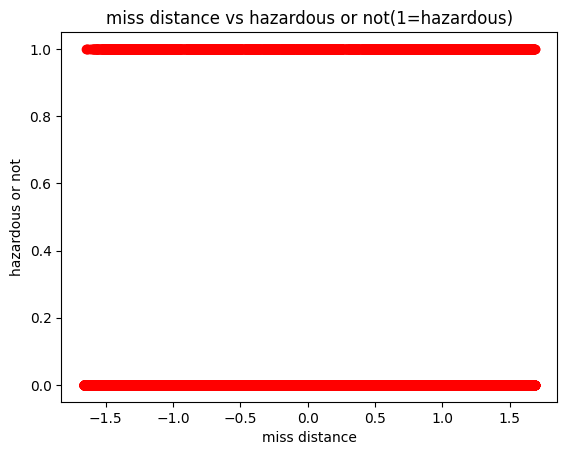

In [31]:
plt.scatter(X_test[:,5],y_test,color='red')
plt.title('miss distance vs hazardous or not(1=hazardous)')
plt.xlabel('miss distance')
plt.ylabel('hazardous or not')
plt.show()

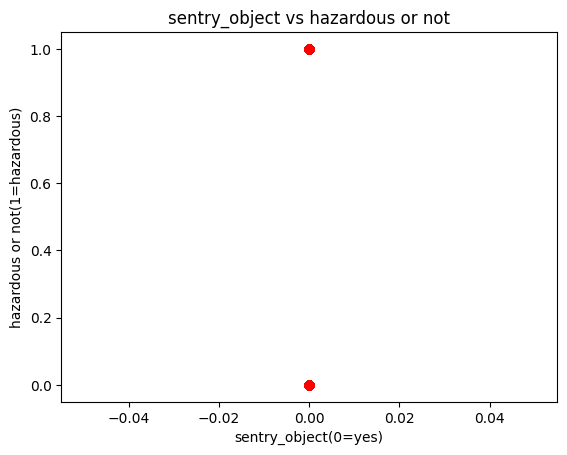

In [32]:
plt.scatter(X_test[:,1],y_test,color='red')
plt.title('sentry_object vs hazardous or not')
plt.xlabel('sentry_object(0=yes)')
plt.ylabel('hazardous or not(1=hazardous)')
plt.show()

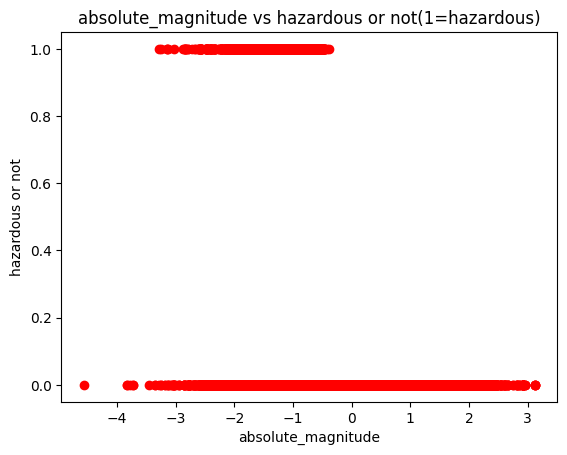

In [33]:
plt.scatter(X_test[:,6],y_test,color='red')
plt.title('absolute_magnitude vs hazardous or not(1=hazardous)')
plt.xlabel('absolute_magnitude')
plt.ylabel('hazardous or not')
plt.show()

Visualising the predicted test set results by the ML model:

1.Linear

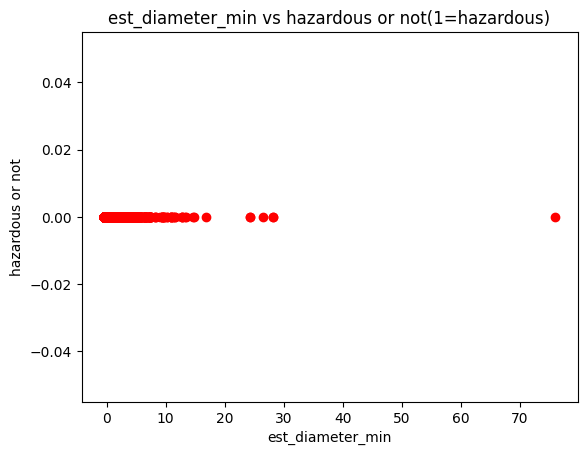

In [34]:
plt.scatter(X_test[:,2],y_pred_lin,color='red')
plt.title('est_diameter_min vs hazardous or not(1=hazardous)')
plt.xlabel('est_diameter_min')
plt.ylabel('hazardous or not')
plt.show()

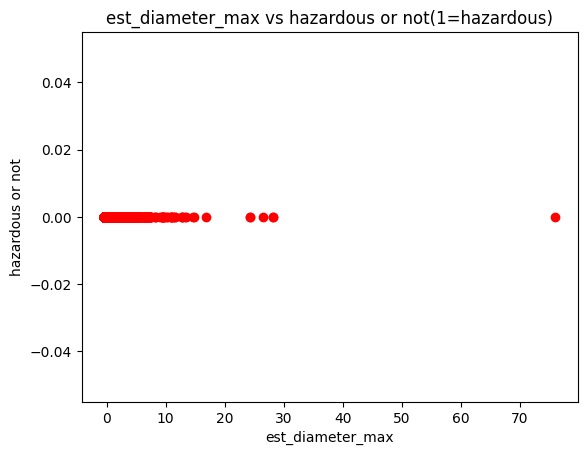

In [35]:
plt.scatter(X_test[:,3],y_pred_lin,color='red')
plt.title('est_diameter_max vs hazardous or not(1=hazardous)')
plt.xlabel('est_diameter_max')
plt.ylabel('hazardous or not')
plt.show()

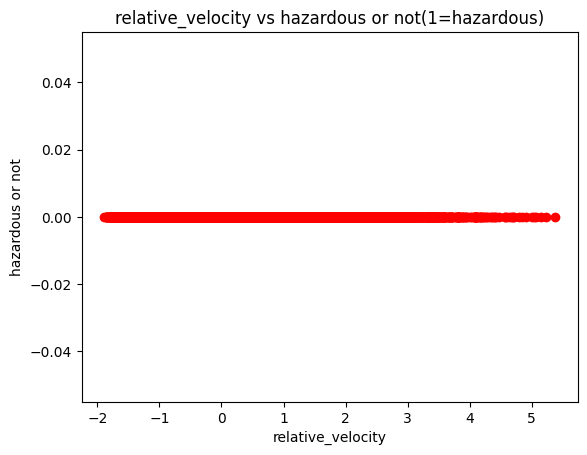

In [36]:
plt.scatter(X_test[:,4],y_pred_lin,color='red')
plt.title('relative_velocity vs hazardous or not(1=hazardous)')
plt.xlabel('relative_velocity')
plt.ylabel('hazardous or not')
plt.show()

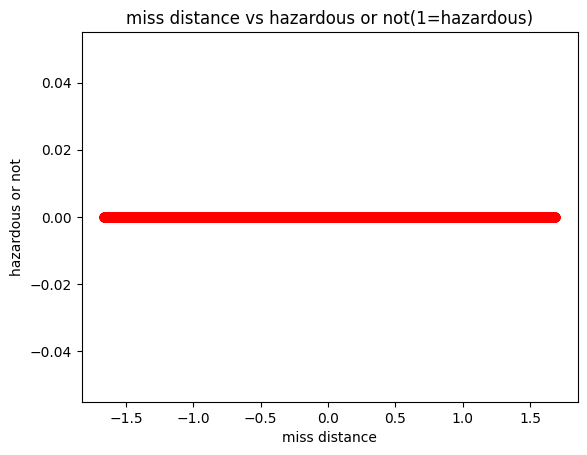

In [37]:
plt.scatter(X_test[:,5],y_pred_lin,color='red')
plt.title('miss distance vs hazardous or not(1=hazardous)')
plt.xlabel('miss distance')
plt.ylabel('hazardous or not')
plt.show()

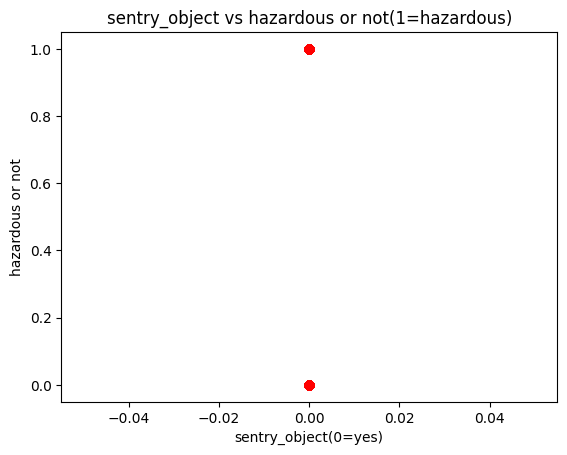

In [38]:
plt.scatter(X_test[:,1],y_test,color='red')
plt.title('sentry_object vs hazardous or not(1=hazardous)')
plt.xlabel('sentry_object(0=yes)')
plt.ylabel('hazardous or not')
plt.show()

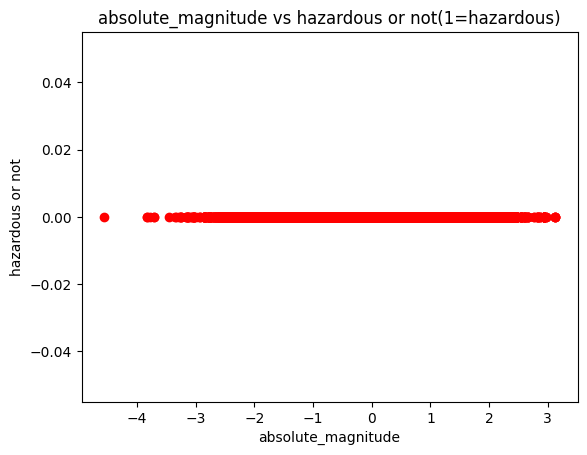

In [39]:
plt.scatter(X_test[:,6],y_pred_lin,color='red')
plt.title('absolute_magnitude vs hazardous or not(1=hazardous)')
plt.xlabel('absolute_magnitude')
plt.ylabel('hazardous or not')
plt.show()

2.RBF

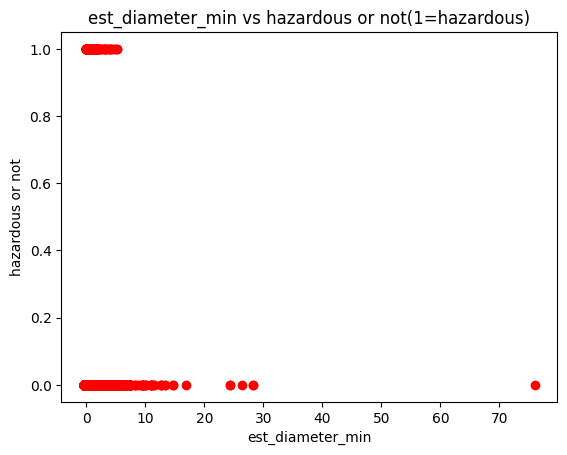

In [40]:
plt.scatter(X_test[:,2],y_pred_rbf,color='red')
plt.title('est_diameter_min vs hazardous or not(1=hazardous)')
plt.xlabel('est_diameter_min')
plt.ylabel('hazardous or not')
plt.show()

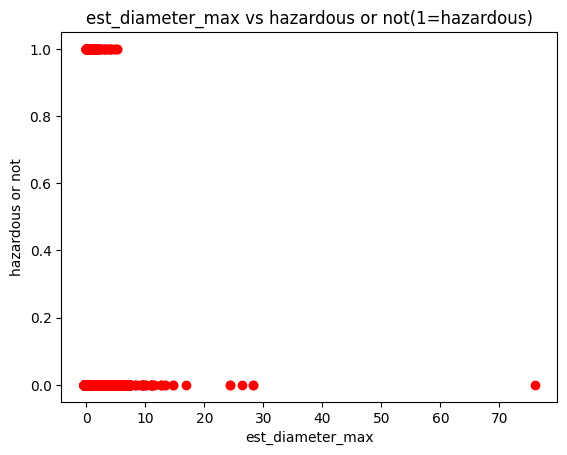

In [41]:
plt.scatter(X_test[:,3],y_pred_rbf,color='red')
plt.title('est_diameter_max vs hazardous or not(1=hazardous)')
plt.xlabel('est_diameter_max')
plt.ylabel('hazardous or not')
plt.show()

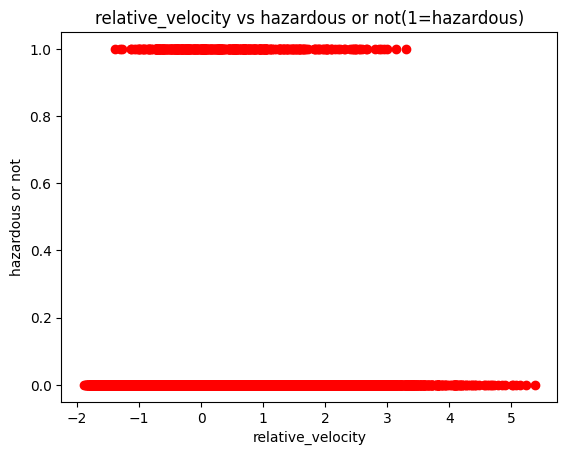

In [42]:
plt.scatter(X_test[:,4],y_pred_rbf,color='red')
plt.title('relative_velocity vs hazardous or not(1=hazardous)')
plt.xlabel('relative_velocity')
plt.ylabel('hazardous or not')
plt.show()

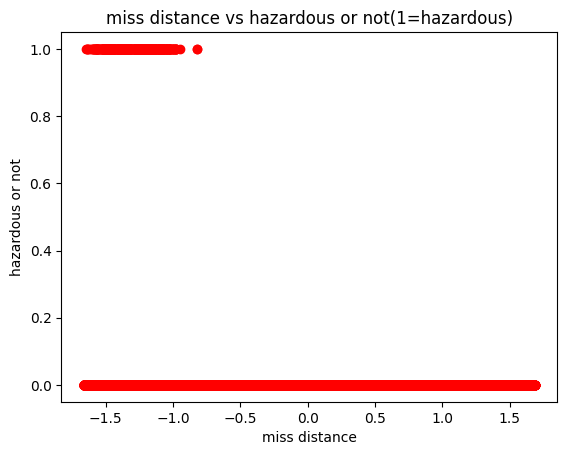

In [43]:
plt.scatter(X_test[:,5],y_pred_rbf,color='red')
plt.title('miss distance vs hazardous or not(1=hazardous)')
plt.xlabel('miss distance')
plt.ylabel('hazardous or not')
plt.show()

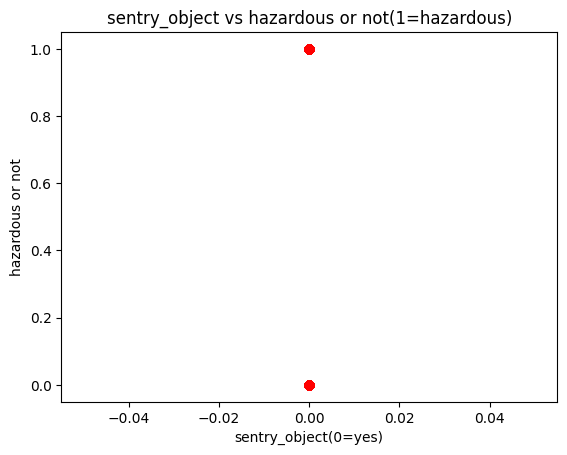

In [44]:
plt.scatter(X_test[:,1],y_pred_rbf,color='red')
plt.title('sentry_object vs hazardous or not(1=hazardous)')
plt.xlabel('sentry_object(0=yes)')
plt.ylabel('hazardous or not')
plt.show()

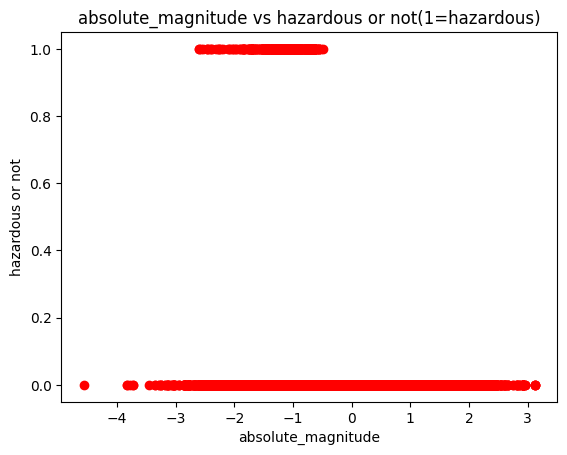

In [45]:
plt.scatter(X_test[:,6],y_pred_rbf,color='red')
plt.title('absolute_magnitude vs hazardous or not(1=hazardous)')
plt.xlabel('absolute_magnitude')
plt.ylabel('hazardous or not')
plt.show()

3.Polynomial

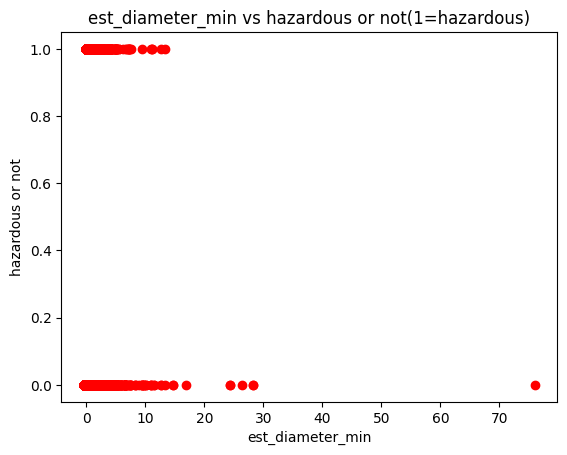

In [55]:
plt.scatter(X_test[:,2],y_test,color='red')
plt.title('est_diameter_min vs hazardous or not(1=hazardous)')
plt.xlabel('est_diameter_min')
plt.ylabel('hazardous or not')
plt.show()

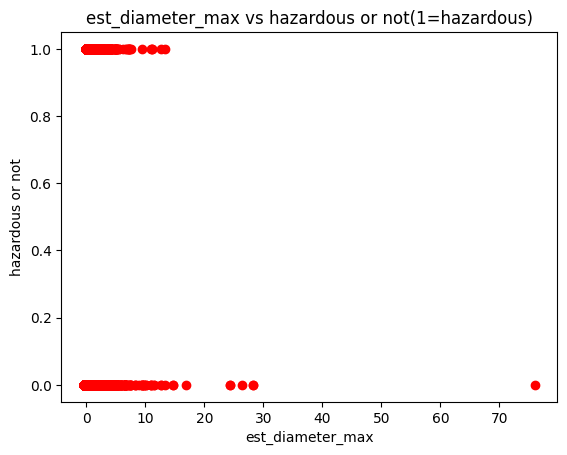

In [56]:
plt.scatter(X_test[:,3],y_test,color='red')
plt.title('est_diameter_max vs hazardous or not(1=hazardous)')
plt.xlabel('est_diameter_max')
plt.ylabel('hazardous or not')
plt.show()

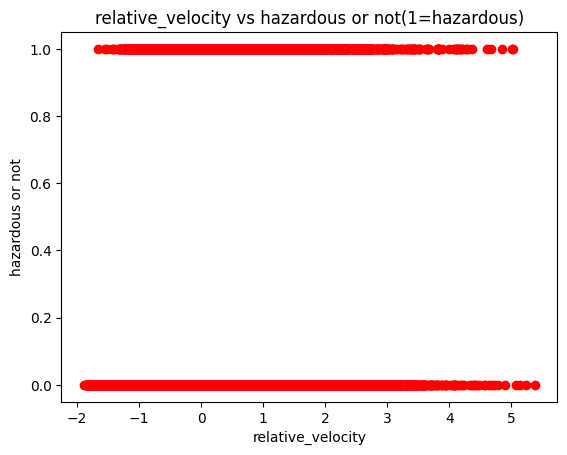

In [57]:
plt.scatter(X_test[:,4],y_test,color='red')
plt.title('relative_velocity vs hazardous or not(1=hazardous)')
plt.xlabel('relative_velocity')
plt.ylabel('hazardous or not')
plt.show()

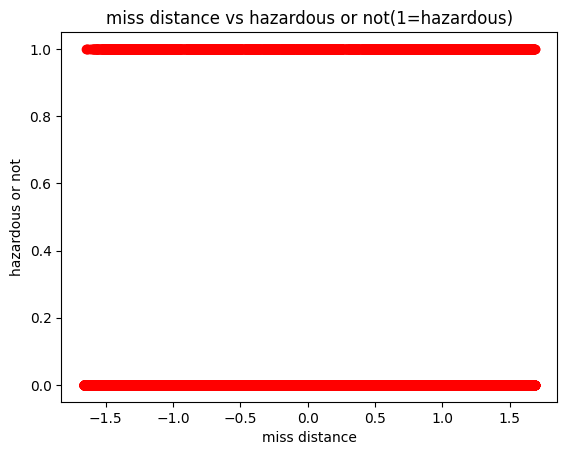

In [58]:
plt.scatter(X_test[:,5],y_test,color='red')
plt.title('miss distance vs hazardous or not(1=hazardous)')
plt.xlabel('miss distance')
plt.ylabel('hazardous or not')
plt.show()

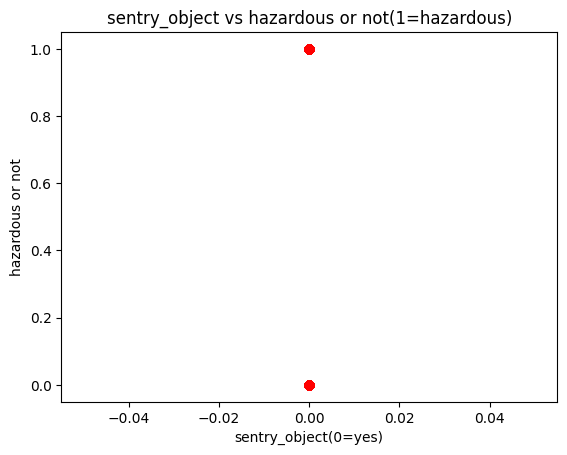

In [59]:
plt.scatter(X_test[:,1],y_test,color='red')
plt.title('sentry_object vs hazardous or not(1=hazardous)')
plt.xlabel('sentry_object(0=yes)')
plt.ylabel('hazardous or not')
plt.show()

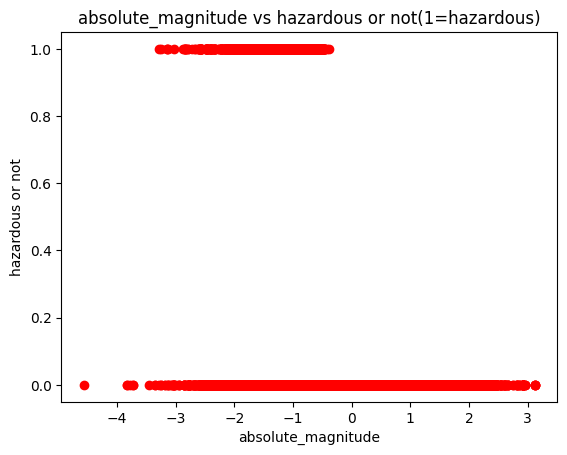

In [60]:
plt.scatter(X_test[:,6],y_test,color='red')
plt.title('absolute_magnitude vs hazardous or not(1=hazardous)')
plt.xlabel('absolute_magnitude')
plt.ylabel('hazardous or not')
plt.show()

4.Sigmoid

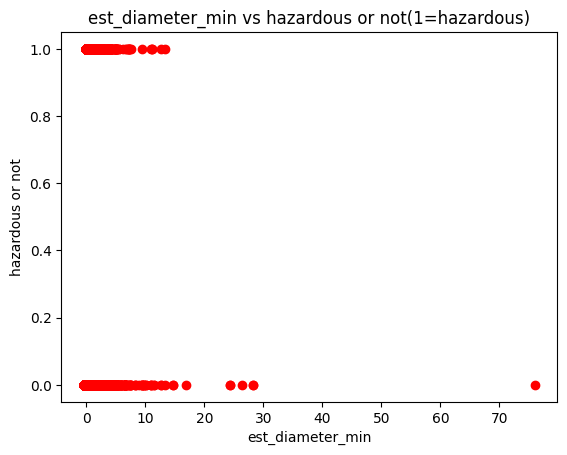

In [46]:
plt.scatter(X_test[:,2],y_test,color='red')
plt.title('est_diameter_min vs hazardous or not(1=hazardous)')
plt.xlabel('est_diameter_min')
plt.ylabel('hazardous or not')
plt.show()

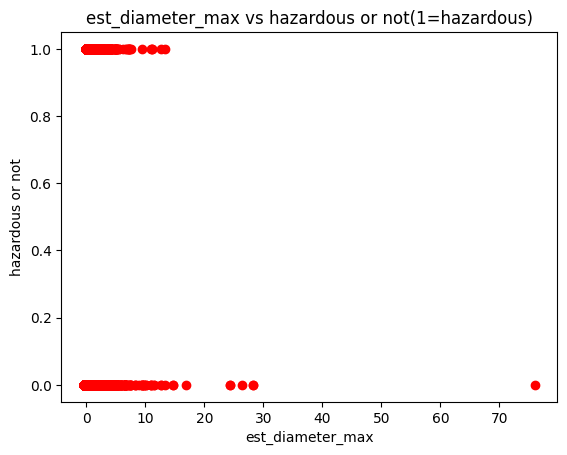

In [47]:
plt.scatter(X_test[:,3],y_test,color='red')
plt.title('est_diameter_max vs hazardous or not(1=hazardous)')
plt.xlabel('est_diameter_max')
plt.ylabel('hazardous or not')
plt.show()

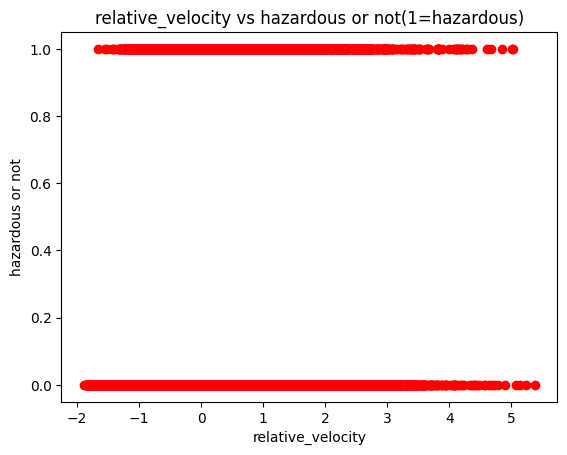

In [48]:
plt.scatter(X_test[:,4],y_test,color='red')
plt.title('relative_velocity vs hazardous or not(1=hazardous)')
plt.xlabel('relative_velocity')
plt.ylabel('hazardous or not')
plt.show()

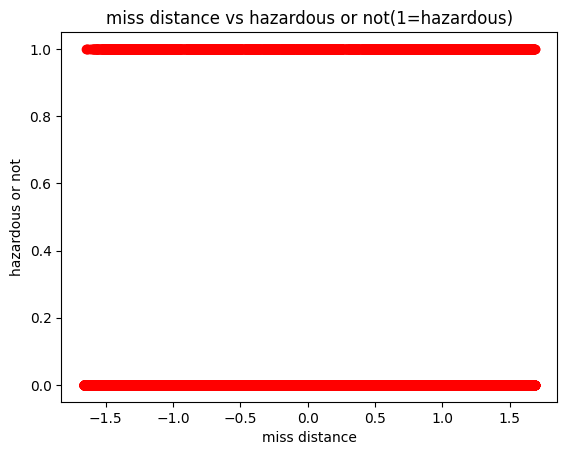

In [49]:
plt.scatter(X_test[:,5],y_test,color='red')
plt.title('miss distance vs hazardous or not(1=hazardous)')
plt.xlabel('miss distance')
plt.ylabel('hazardous or not')
plt.show()

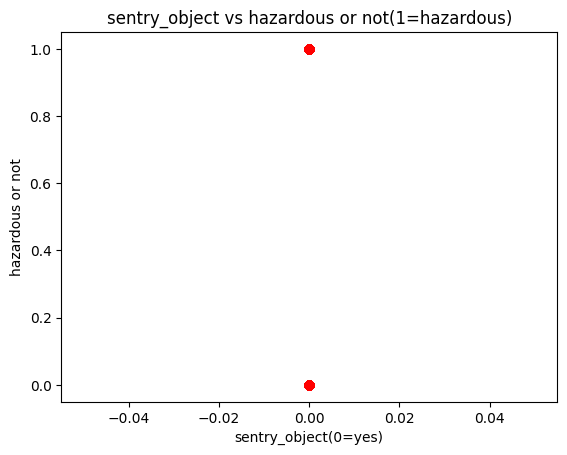

In [50]:
plt.scatter(X_test[:,1],y_test,color='red')
plt.title('sentry_object vs hazardous or not(1=hazardous)')
plt.xlabel('sentry_object(0=yes)')
plt.ylabel('hazardous or not')
plt.show()

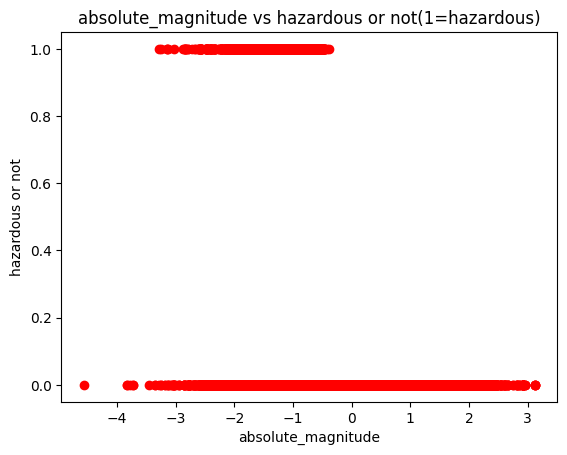

In [51]:
plt.scatter(X_test[:,6],y_test,color='red')
plt.title('absolute_magnitude vs hazardous or not(1=hazardous)')
plt.xlabel('absolute_magnitude')
plt.ylabel('hazardous or not')
plt.show()